# ML for State Energy Comparison - Linear Regression

In [14]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
# read the data
df = pd.read_csv("db/states_comparison.csv", index_col=0)
df.head()

,State,Year,Prod Data,Cons Data,Difference
0,Alaska,1960,6800.0,61433.0,-54633.0
1,Alabama,1960,112809.0,866594.0,-753785.0
2,Arkansas,1960,48104.0,425974.0,-377870.0
3,Arizona,1960,36181.0,282993.0,-246812.0
4,California,1960,270161.0,3449919.0,-3179758.0


In [3]:
# select a state 
df = df.loc[df["State"] == "Texas"]
df.head()

,State,Year,Prod Data,Cons Data,Difference
43,Texas,1960,50155.0,4416216.0,-4366061.0
94,Texas,1961,52023.0,4447880.0,-4395857.0
145,Texas,1962,47721.0,4640675.0,-4592954.0
196,Texas,1963,42718.0,4894089.0,-4851371.0
247,Texas,1964,43884.0,5012683.0,-4968799.0


In [4]:
# see the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 43 to 2950
Data columns (total 5 columns):
State         58 non-null object
Year          58 non-null int64
Prod Data     58 non-null float64
Cons Data     58 non-null float64
Difference    58 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ KB


In [5]:
# select X and y values
X = df["Difference"].values.reshape(-1,1)
y = df["Year"].values.reshape(-1,1)

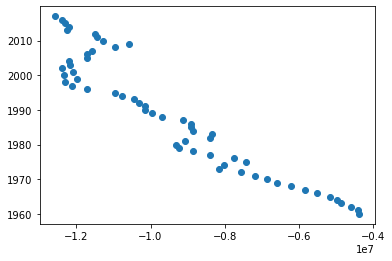

In [6]:
# see if data is linear
plt.scatter(X,y)

In [7]:
# split the data to train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# calculate the scores

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9076853247183957
Testing Score: 0.7968261613965317


In [10]:
# Use our model to make predictions
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X_test)

In [11]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 43.750099912613486
R-squared (R2 ): 0.7968261613965317


In [12]:
predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

Predicted classes: [[1999.25117946]
 [1956.63761094]
 [1999.24757504]
 [2004.33795622]
 [2006.14873587]]


In [13]:
n = model.predict([[2050]])
n

array([[1925.85260829]])